In [ ]:
# Doing some Object Detection on a video
reader = imageio.get_reader('funny_dog.mp4') # We open the video.
fps = reader.get_meta_data()['fps'] # We get the fps frequence (frames per second).
writer = imageio.get_writer('output.mp4', fps = fps) # We create an output video with this same fps frequence.
for i, frame in enumerate(reader): # We iterate on the frames of the output video:
    frame = detect(frame, net.eval(), transform) # We call our detect function (defined above) to detect the object on the frame.
    writer.append_data(frame) # We add the next frame in the output video.
    print(i) # We print the number of the processed frame.
writer.close() # We close the process that handles the creation of the output video.

In [1]:

import os
import sys
import random
import math
import numpy as np
import scipy.misc
import matplotlib
import matplotlib.pyplot as plt

import coco
import utils
import model as modellib
import visualize

%matplotlib inline 

# Root directory of the project
ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to trained weights file
# Download this file and place in the root of your 
# project (See README file for details)
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

/home/ivan_radkevich_92/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.print()


Configurations:
BACKBONE_SHAPES                [[256 256]
 [128 128]
 [ 64  64]
 [ 32  32]
 [ 16  16]]
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
GPU_COUNT                      1
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_MIN_DIM                  800
IMAGE_PADDING                  True
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.002
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTANCES               100
MEAN_PIXEL                     [123.7 116.8 103.9]
MINI_MASK_SHAPE                (56, 56)
NAME                           coco
NUM_CLASSES                    81
POOL_SIZE                      7
POST_NMS_ROIS_INFERENCE        1000
POST_NMS_ROIS_TRAINING     

In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [4]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

/home/ivan_radkevich_92/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


Processing 1 images
image                    shape: (350, 630, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
Processing 1 images
image                    shape: (333, 500, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 1024.00000
Processing 1 images
image                    shape: (1160, 1600, 3)       min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 1600.00000
Processing 1 images
image                    shape: (350, 630, 3)         min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)

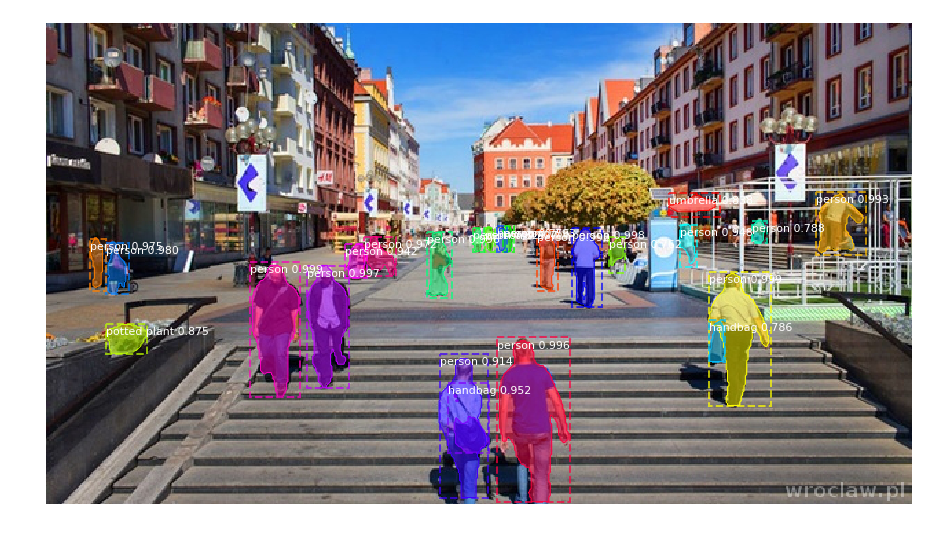

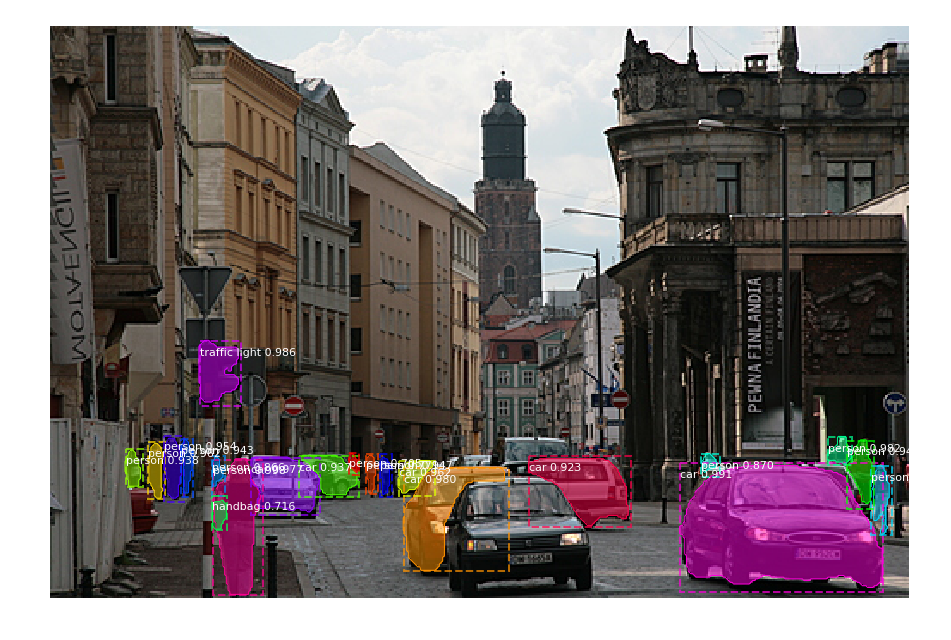

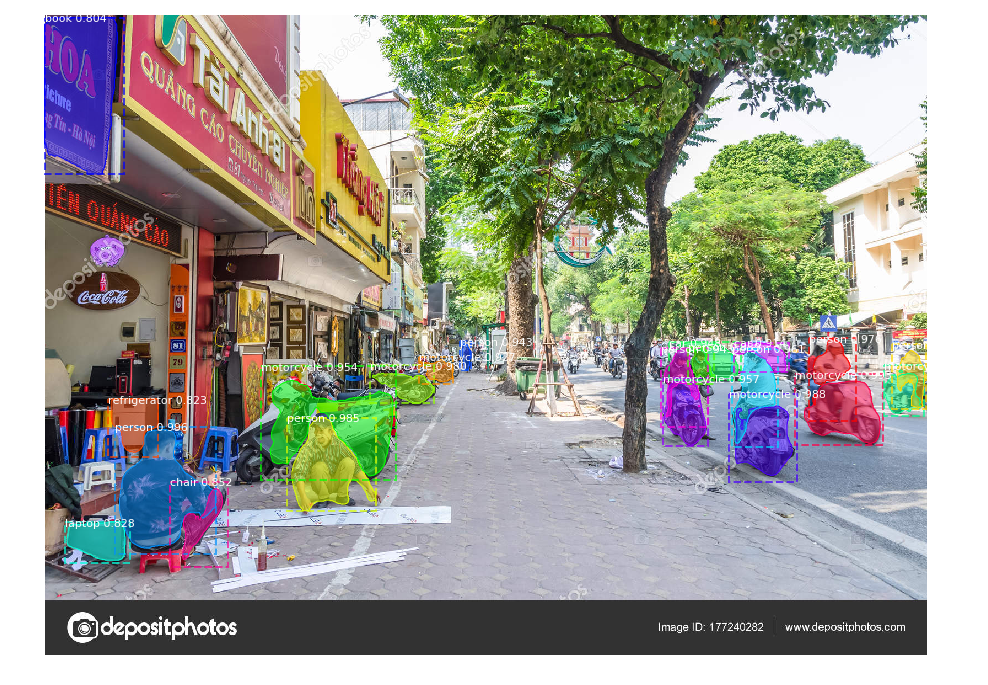

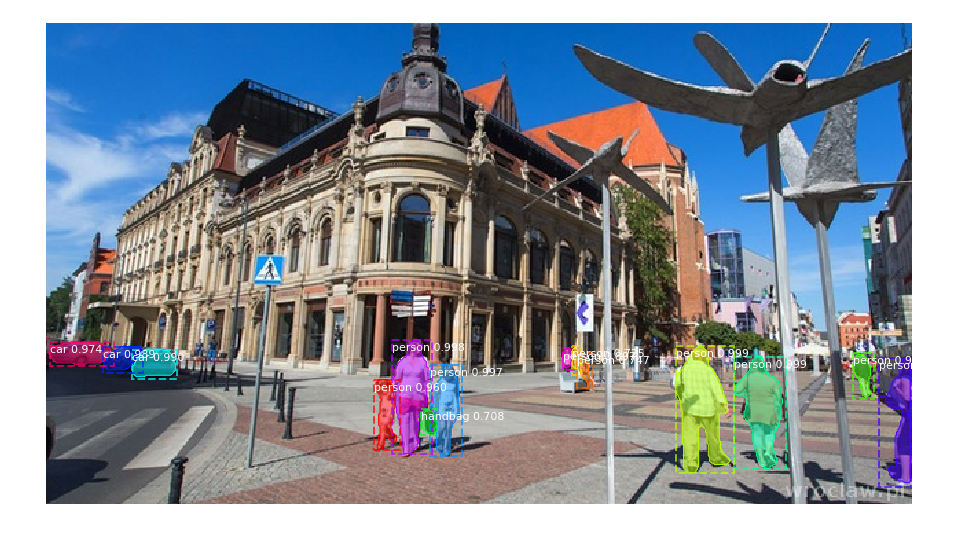

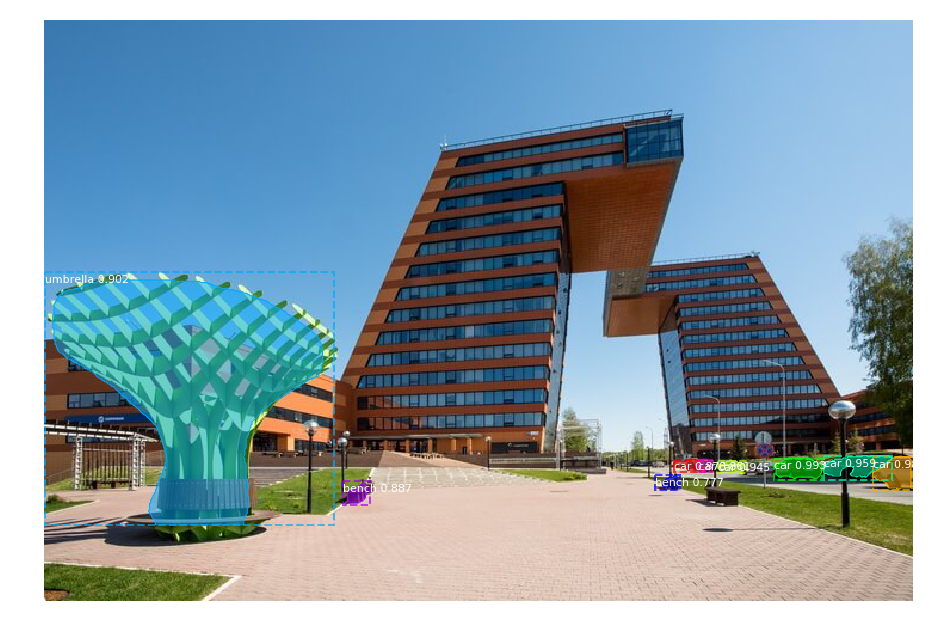

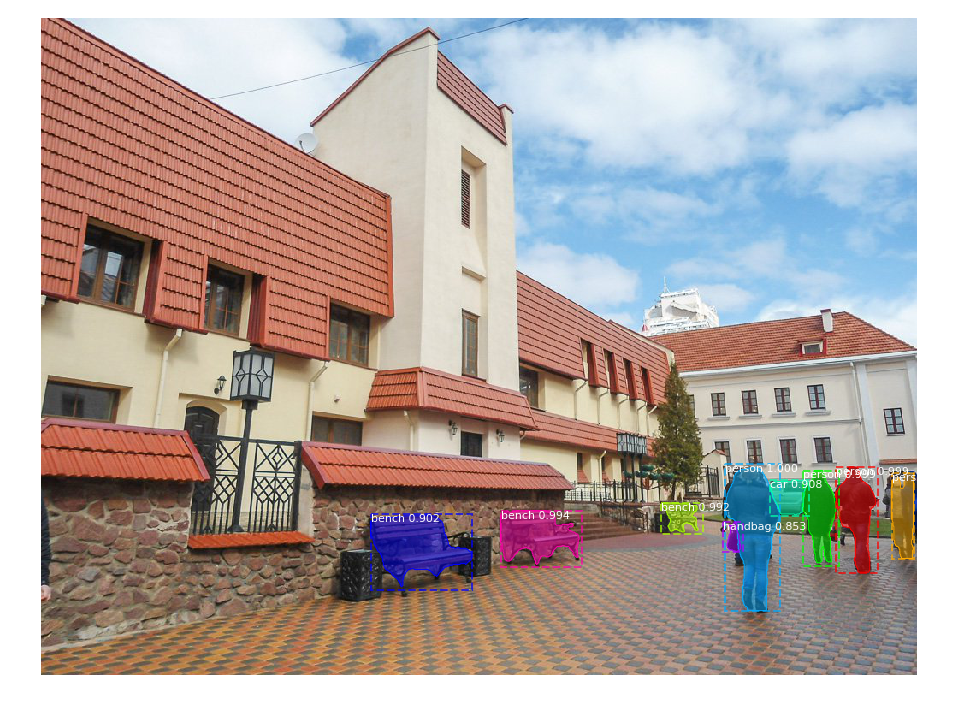

In [5]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
x = len(file_names)
for k in range(x):
    image = scipy.misc.imread(os.path.join(IMAGE_DIR, file_names[k]))

    # Run detection
    results = model.detect([image], verbose=1)

    # Visualize results
    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

In [23]:
import imageio
import cv2

reader = imageio.get_reader('0002-20170519-2.mp4') # We open the video.
fps = reader.get_meta_data()['fps'] # We get the fps frequence (frames per second).
writer = imageio.get_writer('output.mp4', fps = fps)

for i, frame in enumerate(reader): # We iterate on the frames of the output video:
    #frame = scipy.misc.imread(frame) # We call our detect function (defined above) to detect the object on the frame.
    height, width = frame.shape[:2]
    print(height, width, "height, width")
    
    results = model.detect([frame], verbose=1)
    r = results[0]
    print(r['rois'][0], "rois 1",len(r['scores']))
    print(class_names[r['class_ids'][1]])
    #viz = visualize.display_instances(frame, r['rois'], r['masks'], r['class_ids'],class_names, r['scores'])
    
    #как писать на изображение, только это в торче, а тут тф
    for i in range(len(r['scores'])): # For every class:
        j = 0 # We initialize the loop variable j that will correspond to the occurrences of the class.
        print(j)
        if r['scores'][j] >= 0.6: # We take into account all the occurrences j of the class i that have a matching score larger than 0.6.
            #pt = (detections[0, i, j, 1:] * scale).numpy() # We get the coordinates of the points at the upper left and the lower right of the detector rectangle.
            cv2.rectangle(frame, (int(r['scores'][0]), int(r['scores'][1])), (int(r['scores'][2]), int(r['scores'][3])), (255, 0, 0), 4) # We draw a rectangle around the detected object.
            cv2.putText(frame,class_names[r['class_ids'][j]], (int(r['scores'][0]), int(r['scores'][1])), cv2.FONT_HERSHEY_SIMPLEX, 4, (255, 255, 255), 2, cv2.LINE_AA) # We put the label of the class right above the rectangle.
            j += 1 # We increment j to get to the next occurrence.
            if (i==1):
                print
                cv2.imshow(frame,1)
    
    writer.append_data(frame) # We add the next frame in the output video.
    
    print(i) # We print the number of the processed frame.
writer.close() # We close the process that handles the creation of the output video

2160 3840 height, width
Processing 1 images
image                    shape: (2160, 3840, 3)       min:    0.00000  max:  255.00000
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
image_metas              shape: (1, 89)               min:    0.00000  max: 3840.00000
[1136 2370 2096 3828] rois 1 14
person
0
0


TypeError: bad argument type for built-in operation